<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_8_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛАБОРАТОРНА РОБОТА 8
Розробка нейронної мережі з використанням бібліотеки KERAS

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

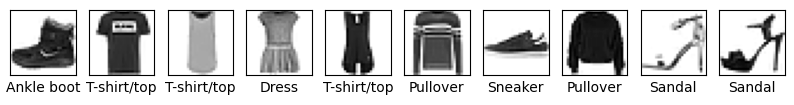

In [33]:
# 1. Завантажити датасет Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Роздрукувати 10 зображень
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [34]:
# 3. Підготовка даних (нормалізація)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 4. Побудова архітектури моделі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Розгортання зображень у вектор
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])
# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Виведення архітектури моделі
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# 5. Використання ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# 6. Навчання моделі
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])
# 7. Збереження моделі на Google Диск
from google.colab import drive
drive.mount('/content/drive')
# Збереження моделі у новому форматі Keras
model.save('/content/drive/MyDrive/fashion_mnist_model.keras')

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7447 - loss: 0.7072 - val_accuracy: 0.8391 - val_loss: 0.4433 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8464 - loss: 0.4299 - val_accuracy: 0.8432 - val_loss: 0.4231 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8584 - loss: 0.3907 - val_accuracy: 0.8605 - val_loss: 0.3805 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8647 - loss: 0.3631 - val_accuracy: 0.8703 - val_loss: 0.3683 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8759 - loss: 0.3389 - val_accuracy: 0.8709 - val_loss: 0.3498 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8799 - loss: 0.3309 - val_accuracy: 0.8726 - val_loss: 0.3468 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8840 - l

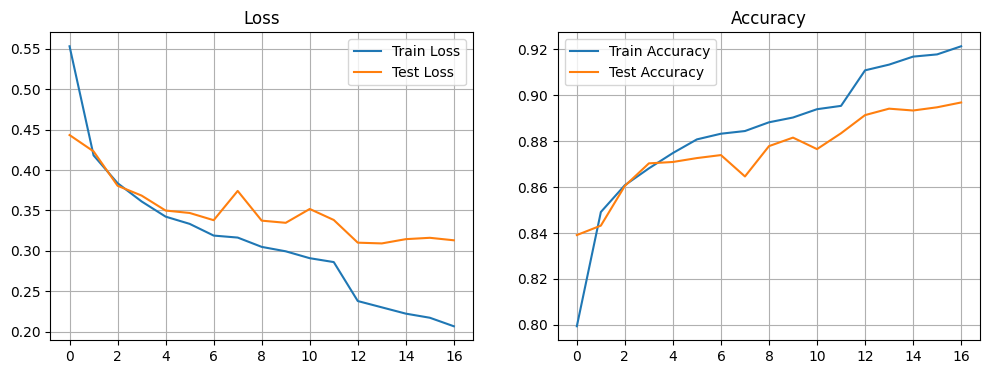

In [36]:
# 8. Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()


313/313 - 1s - 4ms/step - accuracy: 0.8941 - loss: 0.3091
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.79      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.71      0.72      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



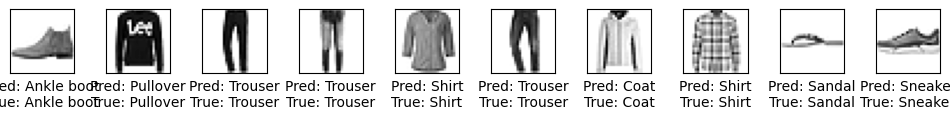

In [38]:
# 9. Виведення класифікаційного звіту
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

# Перетворюємо прогнози в мітки
predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# 10. Результати розпізнавання із прогнозованим і справжнім класом
plt.figure(figsize=(12, 10))  # Збільшимо ширину графіка
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")

# Налаштовуємо відстань між підграфіками
plt.subplots_adjust(wspace=0.5)  # Збільшуємо відстань між зображеннями
plt.show()


In [8]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras_tuner.tuners import RandomSearch

In [40]:
# Завантаження набору даних Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [43]:
import keras
from keras import layers, models
from keras_tuner import RandomSearch
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model(hp):
    model = models.Sequential()

    # Шар Flatten для перетворення зображень у вектор
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Фіксовані шари, як у архітектурі
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))

    # Вихідний шар для класифікації на 10 класів
    model.add(layers.Dense(10, activation='softmax'))

    # Підбір швидкості навчання
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Створюємо RandomSearch для підбору гіперпараметрів
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Кількість спроб для підбору найкращої моделі
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

# Використання ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Пошук найкращих гіперпараметрів
tuner.search(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[early_stopping, reduce_lr])

# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Навчання та оцінка моделі
best_model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[early_stopping, reduce_lr])

# Оцінка моделі на тестових даних
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Reloading Tuner from tuner_logs/fashion_mnist_classification/tuner0.json


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9262 - loss: 0.1970 - val_accuracy: 0.8919 - val_loss: 0.3223 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9259 - loss: 0.1988 - val_accuracy: 0.8956 - val_loss: 0.3137 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9296 - loss: 0.1865 - val_accuracy: 0.8932 - val_loss: 0.3110 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9324 - loss: 0.1847 - val_accuracy: 0.8967 - val_loss: 0.3126 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9316 - loss: 0.1835 - val_accuracy: 0.8932 - val_loss: 0.3213 - learning_rate: 1.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9332 - loss: 0.1787 - val_accuracy: 0.8966 - val_loss: 0.3123 - learning_rate: 1.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/st

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9485 - loss: 0.1378 - val_accuracy: 0.9023 - val_loss: 0.3119 - learning_rate: 1.2500e-05
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9514 - loss: 0.1327 - val_accuracy: 0.9009 - val_loss: 0.3140 - learning_rate: 1.2500e-05
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9492 - loss: 0.1366 - val_accuracy: 0.9017 - val_loss: 0.3135 - learning_rate: 1.2500e-05
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9525 - loss: 0.1302 - val_accuracy: 0.9016 - val_loss: 0.3130 - learning_rate: 1.2500e-05
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9541 - loss: 0.1283 - val_accuracy: 0.9025 - val_loss: 0.3137 - learning_rate: 6.2500e-06


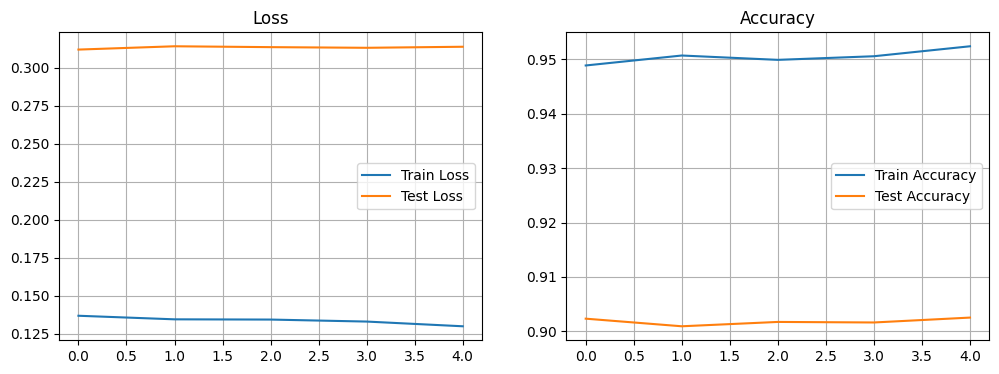

In [45]:
# Навчання моделі і збереження історії тренування
history = best_model.fit(train_images, train_labels,
                         epochs=50,
                         validation_data=(test_images, test_labels),
                         callbacks=[early_stopping, reduce_lr])

# Побудова графіків функції втрат і точності
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()


313/313 - 1s - 3ms/step - accuracy: 0.9023 - loss: 0.3119
Test loss: 0.3118673861026764
Test accuracy: 0.9023000001907349
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.81      0.83      0.82      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.81      0.84      0.83      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.75      0.72      0.74      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



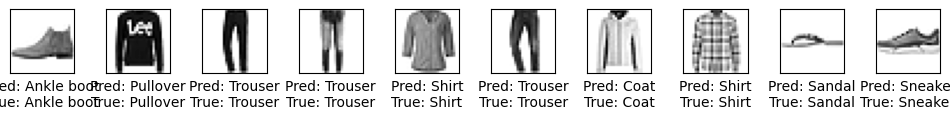

In [46]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Оцінка моделі на тестових даних
test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

# Прогнози для тестових зображень
predictions = best_model.predict(test_images)

# Перетворюємо ймовірності в мітки класів
predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(test_labels, predicted_labels, target_names=class_names))

# Візуалізація результатів розпізнавання із прогнозованими та справжніми класами
plt.figure(figsize=(12, 10))  # Збільшена ширина графіка

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")

# Налаштування відстані між підграфіками
plt.subplots_adjust(wspace=0.5)  # Збільшуємо відстань між зображеннями
plt.show()


Результати навчання за допомогою Keras Tuner показали трохи вищу точність на тестових даних (0.90), порівняно з моделлю, яка була навчена звичайним методом через model.fit (0.8968). Це свідчить про те, що Keras Tuner зміг підібрати гіперпараметри, які забезпечили кращу генералізацію моделі.Тому, хоча навчання за допомогою model.fit є швидшим для базової моделі, застосування Keras Tuner дає кращу модель у випадку потреби в підвищеній точності та стабільності.